In [340]:
"""
Importamos las librerías necesarias para correr nuestro código. Usamos librerías para graficar y tratar nuestros datos algebraicamente. 
"""
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import seaborn as sns
from scipy import stats
import pandas as pd
from tabulate import tabulate

Definimos algunos parámetros que utilizaremos más adelante. 

In [341]:
'''Cantidad de pasos, modifique esta cantidad para observar el comportamiento de la distribución.'''
N=500

In [342]:
x=0
'''Origen de la marcha aleatoria'''
n=list(range(0,100,5))
'''Lista que usaremos para analizar el promedio y la desviación estándar'''
a=1
'''Tamaño del paso'''
rep=1000 
'''Repeticiones de la marcha aleatoria'''
lista=[]
lista2=[]


In [343]:
def pasos (N,x,a,rep):
    '''
    Genera la marcha aleatoria de N pasos. Retorna una lista con las posiciones finales después de los N pasos.

            Parameters:
                    N (int): Número de pasos de la marcha aleatoria
                    x(float): Posición después de dar un paso
                    a(float):Longitud del paso.
                    rep(int): Número de veces que queremos correr el programa. Es decir número de veces que queremos repetir la marcha aleatoria.

            Returns:
                    pfinal (list): Lista de datos con las posiciones finales de las caminatas aleatorias.
                    intervalo (dupla): Intervalo para graficar
            Nota importante: Esta función fue creada con ayuda de Camila Cárdenas
    '''

    pfinal=[]
    for i in range (0,rep):
        paso=[]
        for j in range (0,N):
            aleatorio=rd.randint(0,1) #Número aleatorio entre 0,1
            paso.append(aleatorio)#Lista de números aleatorios entre 0,1
        paso_derecha=paso.count(1)#Contamos los números que valen 1, es decir los pasos a la derecha.
        x = a*(2*paso_derecha-N) #Posición final después de dar paso_dercha pasos a esa dirección.
        pfinal.append(x) # Lista con las posiciones finales de todas las marchas aleatorias
        intervalo= range(min(pfinal), max(pfinal)) #Intervalo para graficar
    return pfinal, intervalo

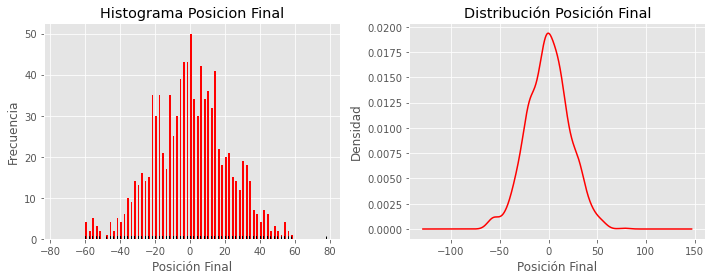

In [344]:
'''
Graficamos un histograma y la distribución de probabilidad de las marchas aleatorias
'''
pfinal, intervals = pasos(N,x,a,rep)[0], pasos(N,x,a,rep)[1]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].hist(pfinal, bins=intervals, density=False, color='red', label = 'muestra_1')
axs[0].plot(pfinal, np.full_like(pfinal, -0.001), '|k', markeredgewidth=1)
axs[0].set_title('Histograma Posicion Final')
axs[0].set_xlabel('Posición Final')
axs[0].set_ylabel('Frecuencia')

pd.Series(pfinal).plot.kde(ax=axs[1],color='red')
axs[1].set_title('Distribución Posición Final')
axs[1].set_xlabel('Posición Final')
axs[1].set_ylabel('Densidad')

fig.tight_layout();

In [345]:
'''Imprimimos la media de la posición final de las marchas aleatorias para enteder el comportamiento de las gráficas anteriores'''
print("Media de posiciones finales " + str(np.mean(pfinal)))
print("Varianza de posiciones finales " + str(np.var(pfinal)))

Media de posiciones finales -0.172
Varianza de posiciones finales 453.954416


In [346]:
'''Para calcular <r> y <r^2> necesitamos la relacion var(r)=<r^2>-<r>. Para varios N correremos el programa varias veces y calcularemos 
   el promedio y la varianza. Se enuentra el valor de <r^2> y se tabula <r> y <r^2> y se grafica <r^2> en función de N.
'''
def media_r2(list1,list2):
    '''
    Genera una lista de <r> y <r^2> según el númeo de pas

            Parameters:
                    lista1(list): listas vacía donde se ubicarán <r> según el número de pasos
                    lista2(list): Lista vacía donde se ubicarán <r^2> según el número de pasos

            Returns:
                    n (list): Lista con el número de pasos.
                    list1(list): Lista con <r>.
                    list2(list): Lista con <r^2>.
                    
            Nota importante: Esta función fue creada con ayuda de Camila Cárdenas
    '''
    for r in n:
        pfinal=pasos(r,x,a,rep)[0]#Posición final
        media=np.mean(pfinal) #Promedio
        var=np.var(pfinal)#Varianza de posiciones finales
        list1.append(media) #Lista que contiene las medias de las posiciones finales
        list2.append(var+media) #Lista con los valores de <r^2>
    return n, list1, list2

In [347]:
'''
Tabularemos n,<r> y <r^2>
'''
Tabla=[]
lista_n, lista_r, lista_r2 = media_r2(lista,lista2)
k=len(lista_n)
for i in range (k):
    Tabla.append([lista_n[i],lista_r[i],lista_r2[i]])
print(tabulate(Tabla, headers=["n", "⟨r⟩", "⟨r^2⟩"]))#Títtulos de las columnas

  n     ⟨r⟩     ⟨r^2⟩
---  ------  --------
  0   0       0
  5   0.006   5.09396
 10  -0.02    9.6276
 15  -0.162  14.0838
 20  -0.074  19.7485
 25   0.098  26.2404
 30  -0.028  29.6112
 35   0.39   34.4059
 40   0.114  37.161
 45   0.294  46.2796
 50   0.19   50.9099
 55   0.098  54.8724
 60   0.314  63.2674
 65  -0.114  66.281
 70   0.16   68.7904
 75  -0.102  70.0396
 80   0.048  77.3497
 85  -0.262  86.5254
 90   0.102  94.5756
 95  -0.174  96.4917


Text(0.5, 1.0, '$<r^2>$ en función de los pasos')

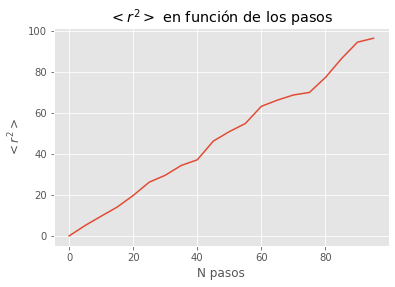

In [348]:
'''Graficamos N y <r^2> para verificar que son proporcionales'''
x=lista_n
y=lista_r2
plt.figure()
plt.style.use('ggplot')
plt.plot(x,y)
plt.xlabel("N pasos")
plt.ylabel(r"$<r^2>$")
plt.title(r"$<r^2>$"" en función de los pasos")

Con esto comprobamos que $<r^2>$ se comporta de manera lineal a $N$, tal y como se propuso en la Teoría.